In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from util import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

pca = PCA(n_components=2)
lr = LogisticRegression()

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.show()

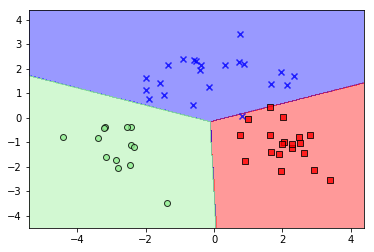

In [8]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)

### Linear Discriminent Analysis

In [2]:
import numpy as np

np.set_printoptions(precision=4)

In [11]:
mean_vectors = []
for i in np.unique(y_train):
    mean_vectors.append(np.mean(X_train_std[y_train==i], axis=0))
print("Mean Vectors: ",mean_vectors)

Mean Vectors:  [array([ 0.9259, -0.3091,  0.2592, -0.7989,  0.3039,  0.9608,  1.0515,
       -0.6306,  0.5354,  0.2209,  0.4855,  0.798 ,  1.2017]), array([-0.8727, -0.3854, -0.4437,  0.2481, -0.2409, -0.1059,  0.0187,
       -0.0164,  0.1095, -0.8796,  0.4392,  0.2776, -0.7016]), array([ 0.1637,  0.8929,  0.3249,  0.5658, -0.01  , -0.9499, -1.228 ,
        0.7436, -0.7652,  0.979 , -1.1698, -1.3007, -0.3912])]


In [13]:
d = 13 #Number of features
s_w = np.zeros((d, d))

for i, mv in zip(np.unique(y_train), mean_vectors):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train==i]:
        class_scatter = class_scatter + ((row-mv).dot((row-mv).T))
    s_w = s_w + class_scatter
print("Within class scatter matrix ", s_w.shape)
print("Class label distribution", np.bincount(y_train))

Within class scatter matrix  (13, 13)
Class label distribution [ 0 40 49 35]


In [15]:
d = 13 #Number of features
s_w = np.zeros((d, d))

for i, mv in zip(np.unique(y_train), mean_vectors):
    class_scatter = np.cov(X_train_std[y_train==i].T)
    s_w = s_w + class_scatter

print("Within class Scatter matrix", s_w.shape)
    

Within class Scatter matrix (13, 13)


In [54]:
overall_mean = np.mean(X_train_std, axis=0)
s_b = np.zeros((13,13))
for i, mv in zip(np.unique(y_train), mean_vectors):
    n = X[y==i, :].shape[0] #Number of samples from original data set
    overall_mean = overall_mean.reshape(13,1)
    mv = mv.reshape(13,1)
    s_b = s_b + (n * (mv-overall_mean).dot((mv-overall_mean).T))
print("Between class scatter matrix", s_b.shape)

Between class scatter matrix (13, 13)


In [55]:
eigenvals, eigenvects = np.linalg.eig(np.linalg.inv(s_w).dot(s_b))
eigenpairs = [(np.abs(eigenvals[i]), eigenvects[:,i]) for i in range(len(eigenvals))]
eigenpairs = sorted(eigenpairs, key=lambda k: k[0], reverse=True)
print("Eigen Values in decreasing order")
print([eigenval[0] for eigenval in eigenpairs])

Eigen Values in decreasing order
[643.01538434605106, 225.08698185416245, 6.5715406336761972e-14, 6.5715406336761972e-14, 5.6843418860808015e-14, 3.7262722895338548e-14, 3.7262722895338548e-14, 3.1540894732489133e-14, 2.0073456383562441e-14, 6.2558500002888746e-15, 6.2558500002888746e-15, 5.7731778153075272e-15, 1.5314167802418994e-15]


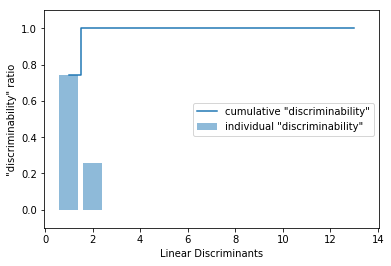

In [56]:
total = sum(eigenvals.real)
discr = [(i/total) for i in sorted(eigenvals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center', label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid', label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

In [57]:
w = np.hstack((eigenpairs[0][1][:, np.newaxis].real, eigenpairs[1][1][:, np.newaxis].real))
print("Weights", w)

Weights [[-0.0707 -0.3778]
 [ 0.0359 -0.2223]
 [-0.0263 -0.3813]
 [ 0.1875  0.2955]
 [-0.0033  0.0143]
 [ 0.2328  0.0151]
 [-0.7719  0.2149]
 [-0.0803  0.0726]
 [ 0.0896  0.1767]
 [ 0.1815 -0.2909]
 [-0.0631  0.2376]
 [-0.3794  0.0867]
 [-0.3355 -0.586 ]]


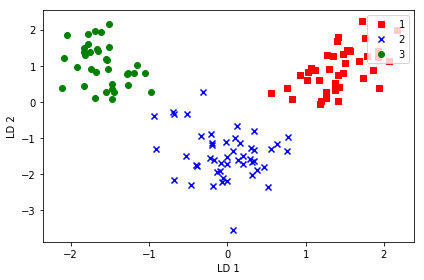

In [64]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0] * (-1),
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

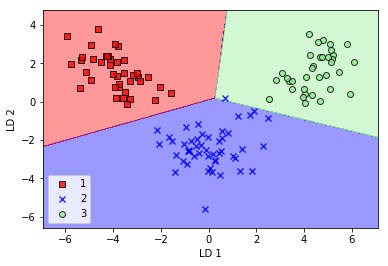

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

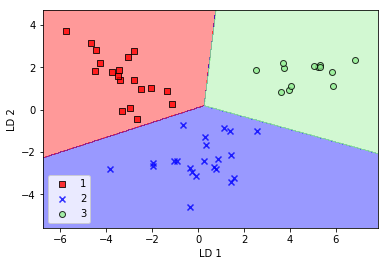

In [67]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

In [148]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from numpy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    K = exp(-gamma * mat_sq_dists)
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    eigvals, eigvecs = eigh(K)
    X_pc = np.column_stack((eigvecs[:, -i]
                            for i in range(1, n_components + 1)))

    return X_pc

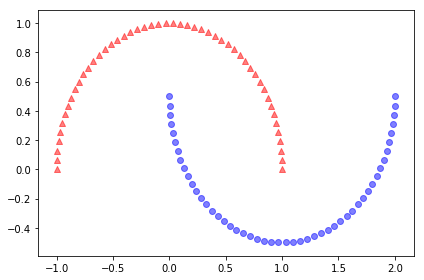

In [146]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('./figures/half_moon_1.png', dpi=300)
plt.show()

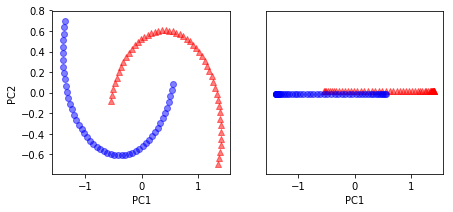

In [127]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)

X_spca = scikit_pca.fit_transform(x)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))

ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02,color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

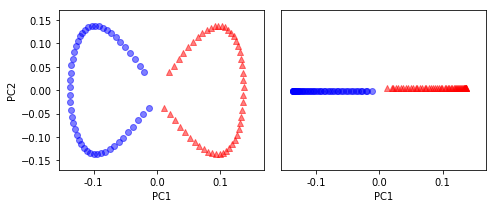

In [149]:
from matplotlib.ticker import FormatStrFormatter

X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], 
            color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
            color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02, 
            color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
            color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

plt.tight_layout()
plt.show()
